progress: 15975 / 15974
crop_path: train_data/pdf/issue/cropped/휴일근무 신청_88/0_53_.png
gt:		  학술대회  , len: 4
wrong_inf:	  학술대희  , len: 4


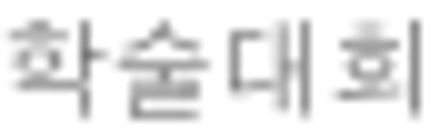

In [4]:
from PIL import Image
from IPython.display import clear_output 
from time import sleep
from pathlib import Path

storage_dir = '/mnt/d/'
dir_dict = {
    'a': -1,
    'd': 1,
}
cmd_list = list(dir_dict.keys()) + ['e', 's', 'k', 'mk', 'j', 'boxed', 'converted', 'pdf']

def color_bg(bg_color, diff_pos, text):
    bg_color = 41 if bg_color != 'g' else 42
    colored_char = f"\x1b[{bg_color}m{text[diff_pos] if len(text) > diff_pos else ''}\x1b[0m"
    return f'{text[:diff_pos]}{colored_char}{text[diff_pos + 1:]}'

def get_diff_pos(gt, wrong_inf):
    diff_pos = 0
    for gt_c, inf_c in zip(gt, wrong_inf):
        if gt_c != inf_c:
            break
        diff_pos += 1
    return diff_pos

def show_meta_log(splited, gt):
    wrong_inf = splited[2] if len(splited) > 2 else ''
    diff_pos = get_diff_pos(gt, wrong_inf)
    bound_block = "\x1b[46m  \x1b[0m"
    print(f"gt:\t\t{bound_block}{color_bg('g', diff_pos, gt)}{bound_block}, len: {len(gt)}")
    print(f"wrong_inf:\t{bound_block}{color_bg('r', diff_pos, wrong_inf)}{bound_block}, len: {len(wrong_inf)}")
    
def show_resized_img(img_crop_path, cmd):
    img_path = storage_dir + img_crop_path
    resize_rate = 10
    if cmd in ['boxed', 'converted']:
        replaced_path = Path(img_path.replace('cropped', cmd))
        file_path_list = [str(file_path) for file_path in replaced_path.parent.iterdir()]
        page_idx = int(replaced_path.name.split('_')[0])
        img_path = sorted(file_path_list)[page_idx]
        resize_rate = 1
    img = Image.open(img_path)
    new_size = (e * resize_rate for e in img.size)
    img.resize(new_size).show()
    
def show_log(lines, line_idx, cmd):
    clear_output()
    splited = lines[line_idx].split('\t')
    img_crop_path, gt = splited[:2]
    print(f"progress: {len(lines)} / {line_idx}")
    print(f"crop_path: {img_crop_path}")
    show_meta_log(splited, gt )
    show_resized_img(img_crop_path, cmd)

def set_line_idx(cmd, line_idx):
    dir_cmd = dir_dict.get(cmd, False)
    if dir_cmd:
            line_idx += dir_cmd
    elif cmd == 'j':
        line_idx = int(input('jump index to'))
    return line_idx

with open('72dpi_extend_color_aug_data_inspect.log', 'r', encoding='utf-8') as inf_log_file:
    lines =[line.rstrip('\n') for line in inf_log_file.readlines()]
    line_idx = 0
    while True :
        cmd = input(
            """
            pev imag: a, current imag: s, next imag: d, \n
            exit: e, show crop path: p, auto slide 10img: k, jump idx: j
            """
            )
        if cmd == 'e':
            break
        elif not cmd in cmd_list:
            continue
        line_idx = set_line_idx(cmd, line_idx)
        
        if cmd == 'k':
            slide_count = int(input('how many slide?')) 
        elif cmd == 'mk':
            slide_count = 10
        else:
            slide_count = 1
        
        for e in range(slide_count):
            if line_idx >= len(lines):
                line_idx = 0
            elif line_idx < 0:
                line_idx = len(lines) + line_idx
            show_log(lines, line_idx, cmd)
            if cmd in ['k', 'mk']:
                line_idx += 1
                sleep(2)
                